In [1]:
# %load ../helpers/header.py
SUB_DIR = "Nets"
# load ENV path to project from .profile 
import os, sys
PROJECT_ROOT_DIR=os.environ.get('ML_PATH')
sys.path.append(os.path.join(PROJECT_ROOT_DIR, "helpers")) # add helper modules to path

# MPL 
import MPL_header #load common MPL imports (from helpers)
import matplotlib.pyplot as plt
%matplotlib inline 
# %matplotlib widget 

# NP, constant seed, PD 
import numpy as np
np.random.seed(12345)
import pandas as pd

# Where to save the figures
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "fig", SUB_DIR)
# IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "fig")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import tensorflow as tf
from tensorflow import keras # shortuct for tensorflow.keras (TF's own keras module!)
## for production better to be explicit, e.g. from tensorflow.keras.layers import Dense 

# Keras: classification

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

## scale featues and create validation set

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [8]:
class_names[y_train[0]] # '4' 

'Coat'

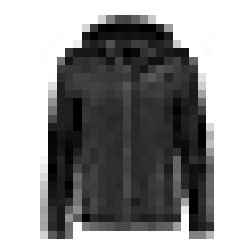

In [9]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

## Creating the model using the Sequential API:  if you know the input shape when creating the model, it is best to specify it (to allow full initialisation without passing data)

In [40]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

### Equivalent implimentation
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

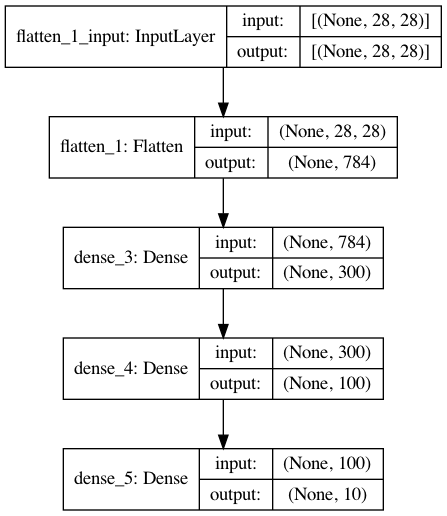

In [47]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True) # TODO explore options / alternatives

In [13]:
model.summary() # None means the batch size can be anything

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [16]:
model.get_layer('dense') is hidden1

True

In [17]:
weights, biases = hidden1.get_weights()
weights

array([[-0.0407337 ,  0.00178954,  0.00395395, ...,  0.02629149,
        -0.0290021 ,  0.05579376],
       [-0.05121028, -0.03910709,  0.0368691 , ..., -0.05956268,
         0.0166725 ,  0.01517525],
       [ 0.04465891,  0.0198639 , -0.05844683, ..., -0.06969424,
         0.02398477,  0.06817472],
       ...,
       [-0.01497108,  0.02217524, -0.01748573, ...,  0.03691453,
        -0.00754955, -0.03473806],
       [-0.00035493, -0.0580858 ,  0.0545754 , ..., -0.0151758 ,
         0.03658339,  0.04903431],
       [ 0.06116712,  0.03295239,  0.00047924, ..., -0.05232245,
         0.07319453,  0.04683219]], dtype=float32)

In [18]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
weights.shape

(784, 300)

In [20]:
biases.shape

(300,)

### Compiling the model: After a model is created, you must call its compile() method to specify the loss func‐ tion and the optimizer to use

In [42]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

### Fit/train and evaluate

In [46]:
 # verbose=1 (bar), 2=each line, default, TODO explore all options: validation_steps (stopping)
 history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2255 - accuracy: 0.9191 - val_loss: 0.3046 - val_accuracy: 0.8906
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2224 - accuracy: 0.9197 - val_loss: 0.3103 - val_accuracy: 0.8918
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2174 - accuracy: 0.9223 - val_loss: 0.3066 - val_accuracy: 0.8868
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2142 - accuracy: 0.9236 - val_loss: 0.3034 - val_accuracy: 0.8930
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2106 - accuracy: 0.9240 - val_loss: 0.3045 - val_accuracy: 0.8906
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2070 - accuracy: 0.9267 - val_loss: 0.3212 - val_accuracy: 0.8856
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2035 - accuracy: 0.9277 - val_loss: 0.2998 - val_accuracy:

### If the training set was very skewed, with some classes being overrepresented and oth‐ ers underrepresented, it would be useful to set the class_weight argument when calling the fit() method, which would give a larger weight to underrepresented classes and a lower weight to overrepresented classes.

### If you need per-instance weights, set the sam ple_weight argument (if both class_weight and sample_weight are provided, Keras multiplies them). Per-instance weights could be useful if some instances were labeled by experts while others were labeled using a crowdsourcing platform: you might want to give more weight to the former.

In [60]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [61]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

(0.0, 1.0)

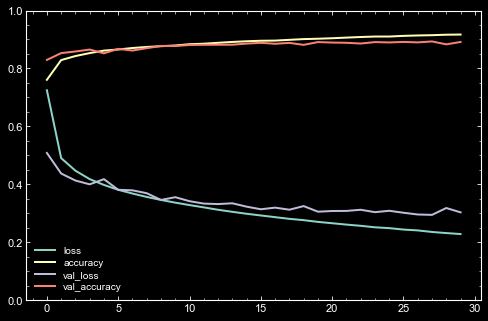

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.style.use('dark_background')
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

### the validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch. So the training curve should be shifted by half an epoch to the left. If you do that, you will see that the training and validation curves overlap almost perfectly at the beginning of training.

In [50]:
## we would normally keep training to converge, try other parmas, CV... you know the drill )
result = model.evaluate(X_test, y_test)
print("test loss, test acc:", result)

313/313 [==============================] - 0s 1ms/step - loss: 81.7613 - accuracy: 0.8482
test loss, test acc: [81.76126098632812, 0.8482000231742859]


## Predict

In [59]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(6)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [62]:
y_pred = model.predict_classes(X_new) # class with highest probability
y_pred
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# Building a Regression MLP Using the Sequential API